# Zomato description


About Dataset

Context:

This is an exploratory Data analysis on the zomato dataset to gain interesting insights on different restaurants from around the world.

Content:

This is an exploratory data analysis of the Zomato dataset. The goal is to find interesting insights about restaurants around the world. This dataset can be useful for people who want to discover new restaurants and cuisines in their area or when traveling.


Variable Info:

* Restaurant Id: Unique id of every restaurant across various cities of the world
* Restaurant Name: Name of the restaurant
* Country Code: Country in which restaurant is located
* City: City in which restaurant is located
* Address: Address of the restaurant
* Locality: Location in the city
* Locality Verbose: Detailed description of the locality
* Longitude: Longitude coordinate of the restaurant's location
* Latitude: Latitude coordinate of the restaurant's location
* Cuisines: Cuisines offered by the restaurant
* Average Cost for two: Cost for two people in different currencies 👫
* Currency: Currency of the country
* Has Table booking: yes/no
* Has Online delivery: yes/ no
* Is delivering: yes/ no
* Switch to order menu: yes/no
* Price range: range of price of food
* Aggregate Rating: Average rating out of 5
* Rating color: depending upon the average rating color
* Rating text: text on the basis of rating of rating
* Votes: Number of ratings casted by people

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ensure to show all columns
pd.set_option('display.max_columns', 999)

In [ ]:
zomato = pd.read_csv('/zomato.csv', encoding='latin-1')
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Exploratory Data Analysis

In [ ]:
zomato.shape

(9551, 21)

There is 9551 rows and 21 columns in this data

summary statistic of the dataset

In [ ]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
zomato.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


There are 9 missing values in Cuisines

In [ ]:
zomato_country = pd.read_excel('/Country-Code.xlsx')
zomato_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [ ]:
zomato_df = pd.merge(zomato, zomato_country, on='Country Code', how='left')
zomato_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


Merging the country code with respective countries because there is no Country column in our data

In [ ]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
zomato_df['Cuisines'].isnull().sum()

9

In [ ]:
zomato_df[zomato_df['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160,United States
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,40,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209,United States
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,40,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102,United States
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,11,United States
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,40,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158,United States
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,10,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707,United States
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309,United States


All the missing Values are from USA

In [ ]:
zomato_df['Has Online delivery'].value_counts()

,count
Has Online delivery,
No,7100
Yes,2451


7,100 of the Cusines doesn't have online delivery in our dataset, while 2,451 has

In [ ]:
zomato_df['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

Unique countries in the dataset

In [ ]:
country_counts = zomato_df['Country'].value_counts()
country_counts

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
UAE,60
South Africa,60
New Zealand,40
Turkey,34
Australia,24


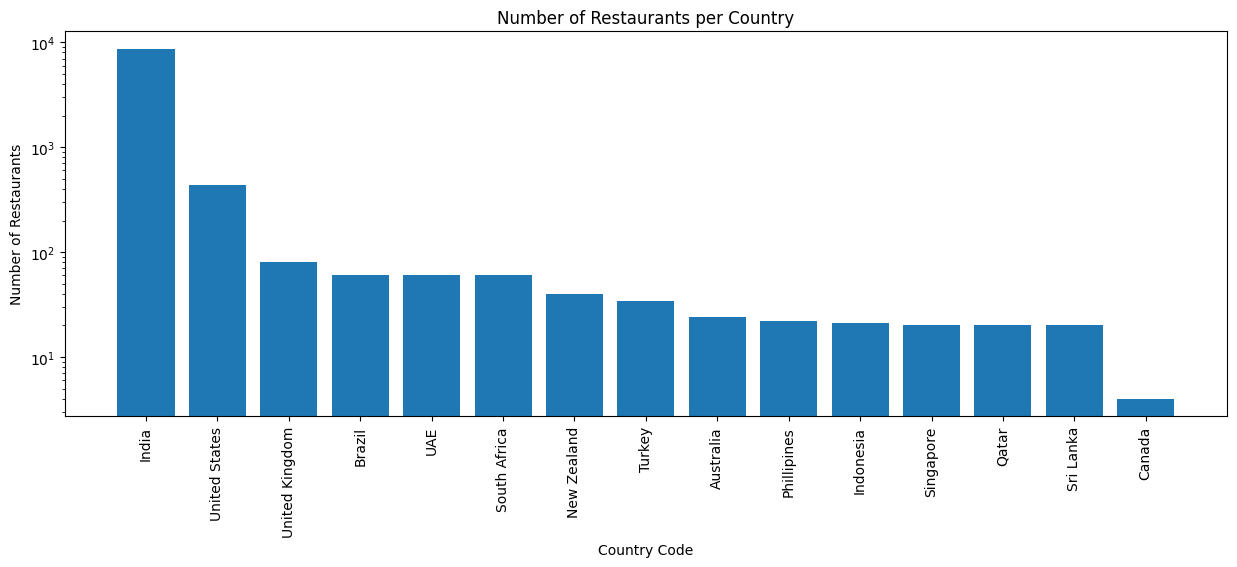

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants per Country')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

The most frequent in our data is India by some margin which intuitive giving zomato headquaters is in India

In [ ]:
rating_count = zomato_df.groupby(['Aggregate rating',	'Rating color',	'Rating text']).size().rename('rating count').reset_index()

rating_count

,Aggregate rating,Rating color,Rating text,rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


How the Cuisines are rated

1. When the rating is between 4.5 to 4.9 - The food is excellent
2. When ratings are between 4.0 to 4.9 - The food is very good
3. Red color represents poor rating
4. Orange color represents average rating
5. Most of the rating is at 0.0 (meaning they were not rated)
6. The least number of rating is 1.8

In [ ]:
rating_text = zomato_df.groupby(['Rating text']).size()

rating_text

,0
Rating text,
Average,3737
Excellent,301
Good,2100
Not rated,2148
Poor,186
Very Good,1079


Most of the ratings are average at 3737

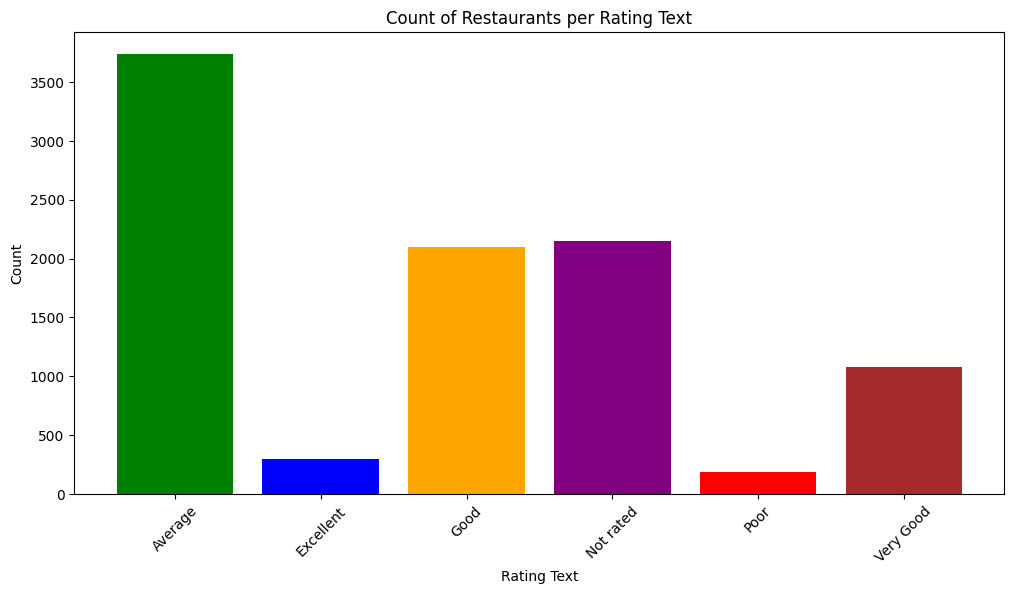

In [ ]:
rating_text = zomato_df.groupby(['Rating text']).size()

colors = ['green', 'blue', 'orange', 'purple', 'red', 'brown']

plt.figure(figsize=(12, 6))
plt.bar(rating_text.index, rating_text.values, color=colors)
plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.title('Count of Restaurants per Rating Text')
plt.xticks(rotation=45)
plt.show()

In [ ]:
continents = {
    'India': 'Asia',
    'Australia': 'Oceania',
    'Brazil': 'South America',
    'Canada': 'North America',
    'Indonesia': 'Asia',
    'New Zealand': 'Oceania',
    'Phillipines': 'Asia',
    'Qatar': 'Asia',
    'Singapore': 'Asia',
    'South Africa': 'Africa',
    'Sri Lanka': 'Asia',
    'Turkey': 'Asia',
    'UAE': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America'
}

# Create a new DataFrame with the continent data
continent_df = pd.DataFrame(list(continents.items()), columns=['Country', 'Continent'])

# Merge the continent dataframe with zomato_df
zomato_df = pd.merge(zomato_df, continent_df, on='Country', how='left')

In [ ]:
zomato_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Continent
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Asia
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Asia


Creating a new Data Frame continent for better exploration for residentials of an area or travelers

In [ ]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'Continent'],
      dtype='object')

In [ ]:
zomato_df.groupby(['Continent', 'Country']).size()

Continent      Country       
Africa         South Africa        60
Asia           India             8652
               Indonesia           21
               Phillipines         22
               Qatar               20
               Singapore           20
               Sri Lanka           20
               Turkey              34
               UAE                 60
Europe         United Kingdom      80
North America  Canada               4
               United States      434
Oceania        Australia           24
               New Zealand         40
South America  Brazil              60
dtype: int64

In [ ]:
cuisine_ratings = zomato_df.groupby(['Cuisines', 'Continent', 'City', 'Rating text', 'Has Table booking', 'Has Online delivery'])['Aggregate rating'].mean().reset_index()

cuisine_ratings = cuisine_ratings.sort_values(['Continent', 'Aggregate rating'], ascending=[True, False])
cuisine_ratings.head()

,Cuisines,Continent,City,Rating text,Has Table booking,Has Online delivery,Aggregate rating
1774,"European, Contemporary",Africa,Inner City,Excellent,No,No,4.9
2074,French,Africa,Pretoria,Excellent,No,No,4.9
4294,Tapas,Africa,Inner City,Excellent,No,No,4.9
840,"Cafe, Burger",Africa,Cape Town,Excellent,No,No,4.8
1436,"Contemporary, Italian",Africa,Sandton,Excellent,No,No,4.8


Top 5 Cuisines in Africa

In [ ]:
online_delivery_restaurants = zomato_df[(zomato_df['Has Online delivery'] == 'Yes') & (zomato_df['Country'] == 'India')]

grouped_data = online_delivery_restaurants.groupby(['City', 'Cuisines', 'Has Online delivery'])['Aggregate rating'].mean().reset_index()

grouped_data = grouped_data.sort_values('Aggregate rating', ascending=False)
grouped_data.head(10)

,City,Cuisines,Has Online delivery,Aggregate rating
35,Coimbatore,"Bakery, Desserts",Yes,4.90
280,Jaipur,"Italian, Bakery, Continental",Yes,4.90
210,Gurgaon,"Mexican, American, Healthy Food",Yes,4.90
31,Chennai,"Mexican, American, Tex-Mex, Burger",Yes,4.80
300,Mumbai,"North Indian, Italian, Chinese, Mexican",Yes,4.70
274,Jaipur,"Cafe, Fast Food, Street Food",Yes,4.70
11,Bangalore,"American, Burger, Cafe",Yes,4.70
12,Bangalore,Asian,Yes,4.70
269,Hyderabad,"Mexican, American, Tex-Mex, Burger",Yes,4.65
80,Gurgaon,"American, Continental, Burger",Yes,4.60


Top 10 rated restaurants in India that has orders can be placed online

In [ ]:
def get_top_cuisines(group):
  return group.sort_values('Aggregate rating', ascending=False).head(5)

cuisine_ratings = zomato_df.groupby(['Continent', 'Cuisines'])['Aggregate rating'].mean().reset_index()

cuisine_ratings = cuisine_ratings.sort_values(['Continent', 'Aggregate rating'], ascending=[True, False])

top_cuisines = cuisine_ratings.groupby('Continent').apply(get_top_cuisines).reset_index(drop=True)

print(top_cuisines)

        Continent                  Cuisines  Aggregate rating
0          Africa    European, Contemporary             4.900
1          Africa                     Tapas             4.900
2          Africa                    French             4.900
3          Africa              Cafe, Burger             4.800
4          Africa     Contemporary, Italian             4.800
5            Asia                  Bar Food             4.900
6            Asia         Mughlai, Lucknowi             4.900
7            Asia             World Cuisine             4.900
8            Asia           Sushi, Japanese             4.900
9            Asia         Sunda, Indonesian             4.900
10         Europe   American, Burger, Grill             4.900
11         Europe    Taiwanese, Street Food             4.900
12         Europe                     Steak             4.900
13         Europe          Chinese, Dim Sum             4.750
14         Europe  Indian, Pakistani, Curry             4.700
15  Nort

top 5 Cuisines in each continents

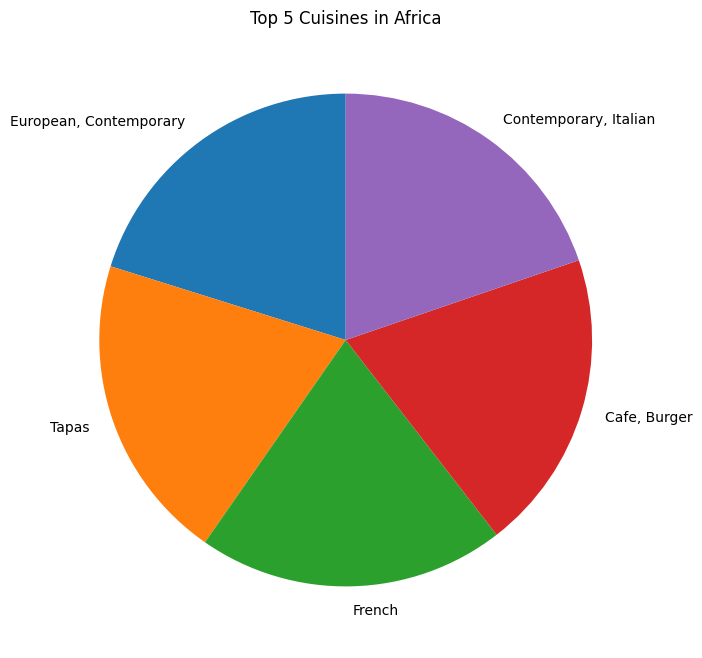

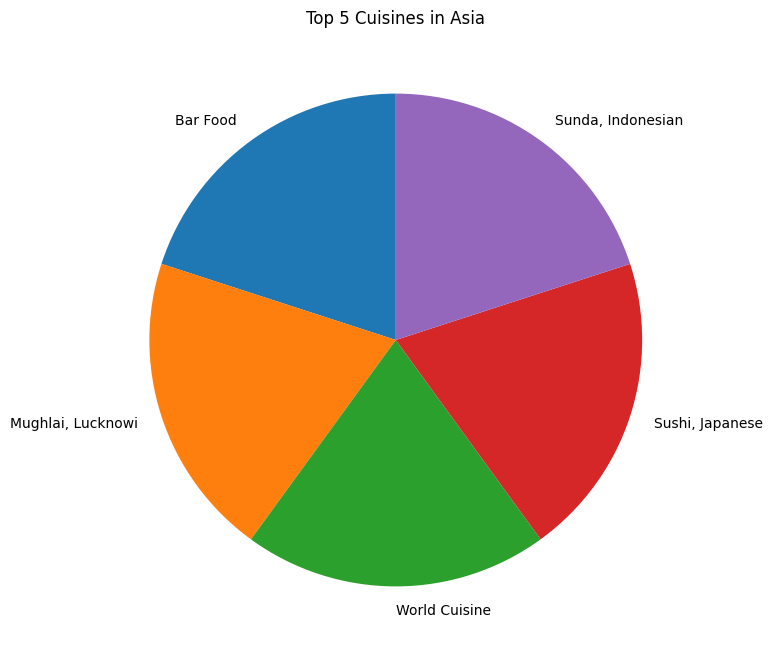

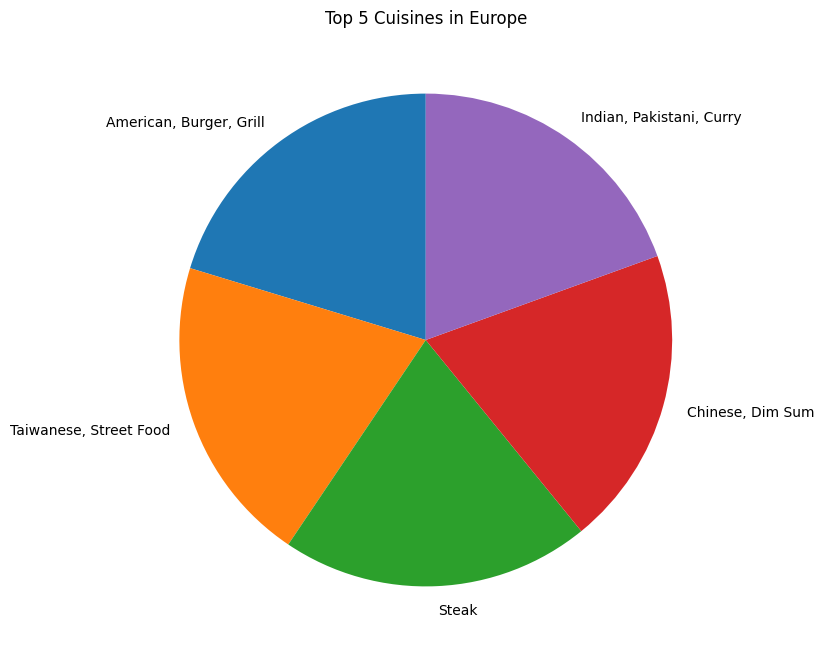

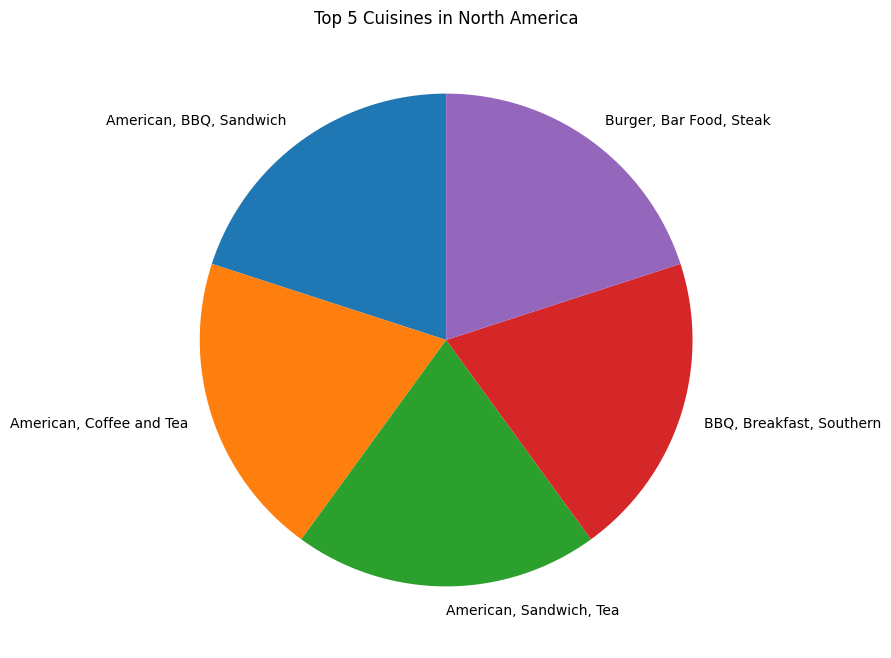

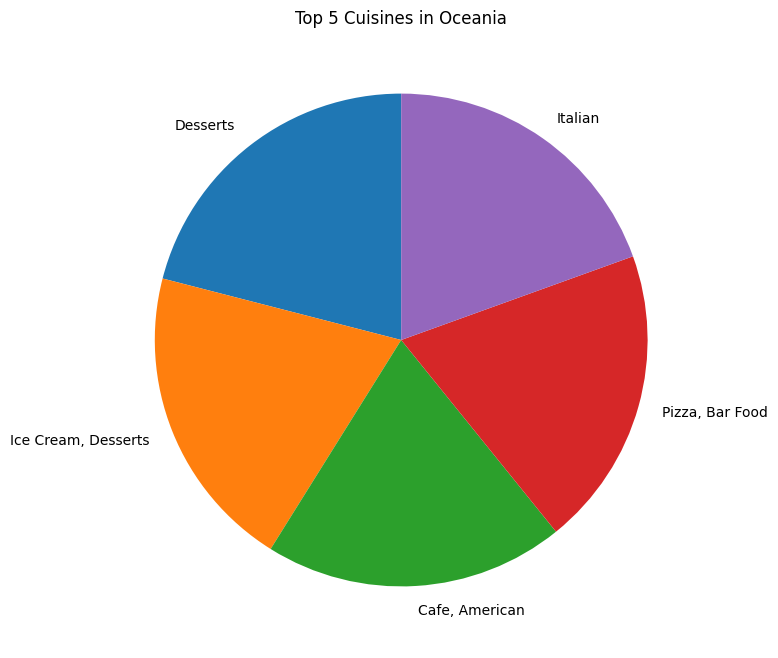

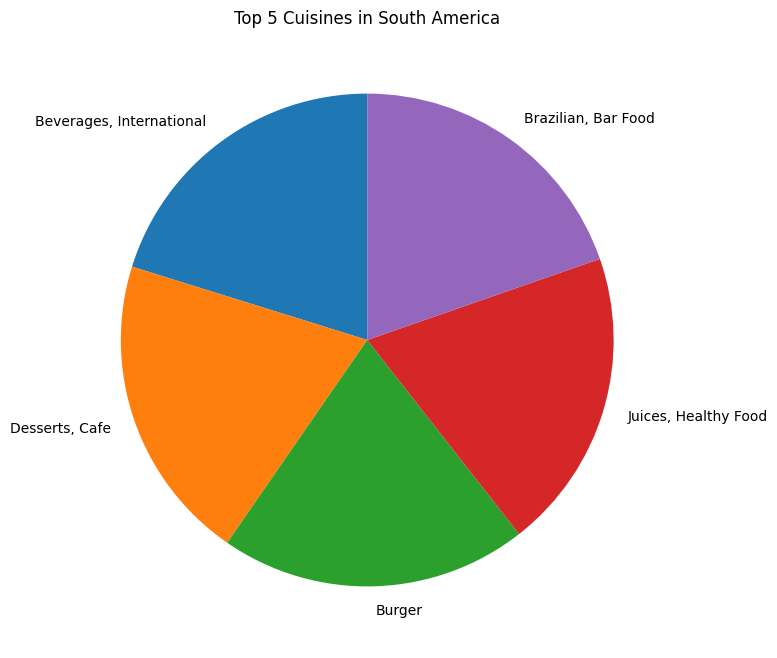

In [ ]:
def get_top_cuisines(group):
  return group.sort_values('Aggregate rating', ascending=False).head(5)

cuisine_ratings = zomato_df.groupby(['Continent', 'Cuisines'])['Aggregate rating'].mean().reset_index()

cuisine_ratings = cuisine_ratings.sort_values(['Continent', 'Aggregate rating'], ascending=[True, False])

# Apply the function to get top 5 cuisines per continent
top_cuisines = cuisine_ratings.groupby('Continent').apply(get_top_cuisines).reset_index(drop=True)

# Create a pie chart for each continent
for continent in top_cuisines['Continent'].unique():
  continent_data = top_cuisines[top_cuisines['Continent'] == continent]
  plt.figure(figsize=(8, 8))
  plt.pie(continent_data['Aggregate rating'], labels=continent_data['Cuisines'], startangle=90)
  plt.title(f'Top 5 Cuisines in {continent}')
  plt.show()

top 5 cuisines in each continent

Top 10 Cusines in the data that has Online Delivery

In [ ]:
online_delivery_restaurants = zomato_df[zomato_df['Has Online delivery'] == 'Yes']

cuisine_ratings = online_delivery_restaurants.groupby(['Cuisines', 'Locality Verbose'])['Aggregate rating'].mean().reset_index()

cuisine_ratings = cuisine_ratings.sort_values('Aggregate rating', ascending=False)

top_10_cuisines = cuisine_ratings.head(10)
top_10_cuisines

,Cuisines,Locality Verbose,Aggregate rating
1095,"Italian, Bakery, Continental","Hotel Clarks Amer, Malviya Nagar, Jaipur",4.9
1030,Ice Cream,"Connaught Place, New Delhi",4.9
1221,"Mexican, American, Healthy Food","DLF Phase 3, Gurgaon",4.9
159,"Bakery, Desserts","Saibaba Colony, Coimbatore",4.9
1226,"Mexican, American, Tex-Mex, Burger","Express Avenue Mall, Royapettah, Chennai",4.8
451,"Cafe, Fast Food, Street Food","C Scheme, Jaipur",4.7
92,Asian,"Indiranagar, Bangalore",4.7
1042,Ice Cream,"Rajouri Garden, New Delhi",4.7
1225,"Mexican, American, Tex-Mex, Burger","Banjara Hills, Hyderabad",4.7
1687,"North Indian, Italian, Chinese, Mexican","Borivali West, Mumbai",4.7


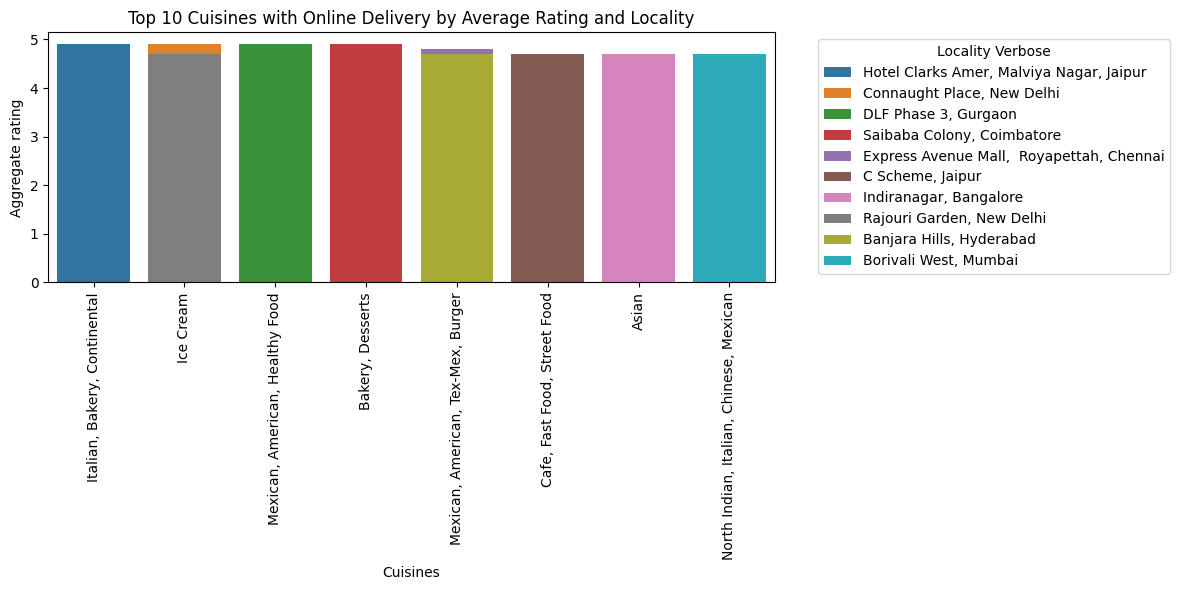

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisines', y='Aggregate rating', hue='Locality Verbose', data=top_10_cuisines, dodge=False)
plt.title('Top 10 Cuisines with Online Delivery by Average Rating and Locality')
plt.xticks(rotation=90)
plt.legend(title='Locality Verbose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

top 10 Cuisines that has online delivery with their Locality Verbose

In [ ]:
zomato_df['Price range'].unique()

array([3, 4, 2, 1])

In [ ]:
# Filter for restaurants with price range 1
price_range_1 = zomato_df[zomato_df['Price range'] == 1]

average_cost = price_range_1['Average Cost for two'].mean()

print(f"Average cost for two for restaurants with price range 1: {average_cost}")

Average cost for two for restaurants with price range 1: 275.18294329432945


In [ ]:
# Filter for restaurants with price range 4
price_range_4 = zomato_df[zomato_df['Price range'] == 4]

average_cost = price_range_4['Average Cost for two'].mean()

print(f"Average cost for two for restaurants with price range 4: {average_cost}")

Average cost for two for restaurants with price range 4: 1848.523890784983


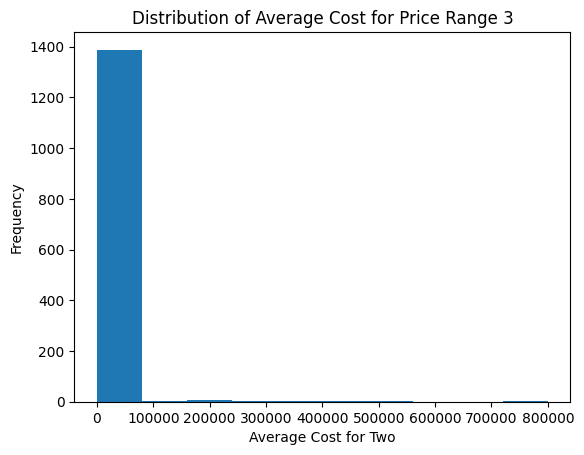

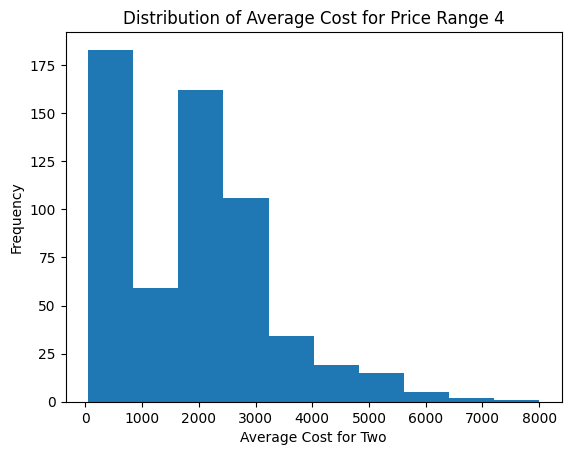

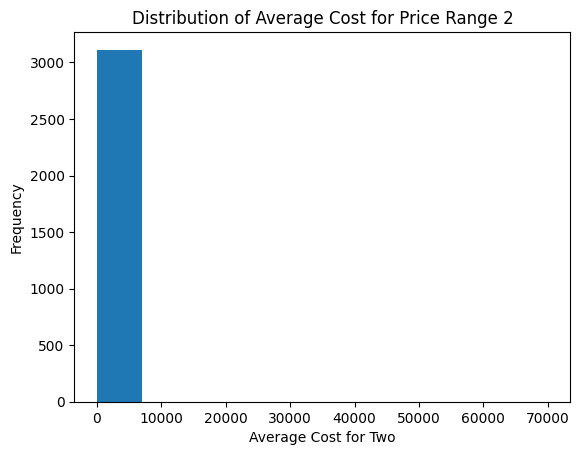

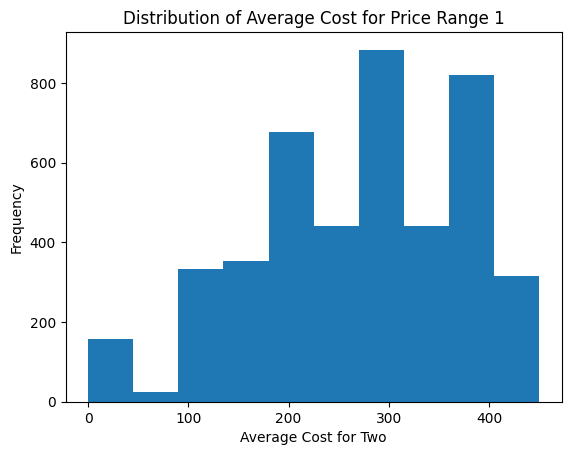

In [ ]:
for price_range in zomato_df['Price range'].unique():
  subset = zomato_df[zomato_df['Price range'] == price_range]
  plt.hist(subset['Average Cost for two'], bins=10)
  plt.title(f'Distribution of Average Cost for Price Range {price_range}')
  plt.xlabel('Average Cost for Two')
  plt.ylabel('Frequency')
  plt.show()

This tells us intuitively that when the price range is 1 the money spent on food is relatively cheap and for 4 is quite expensive (tho the currencies spent are not the same, but we can make the assumption on the general data given the average value and visualization)

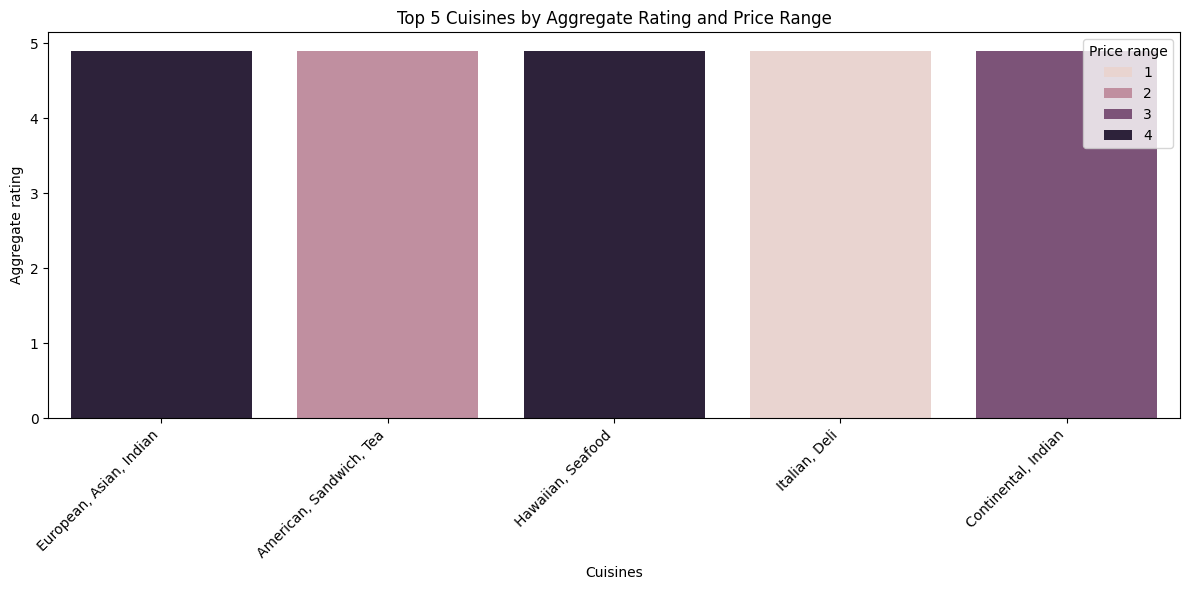

In [ ]:
top_5_cuisines = zomato_df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(5).index.tolist()

filtered_df = zomato_df[zomato_df['Cuisines'].isin(top_5_cuisines)]

plt.figure(figsize=(12, 6))

sns.barplot(x='Cuisines', y='Aggregate rating', hue='Price range', data=filtered_df)
plt.title('Top 5 Cuisines by Aggregate Rating and Price Range')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

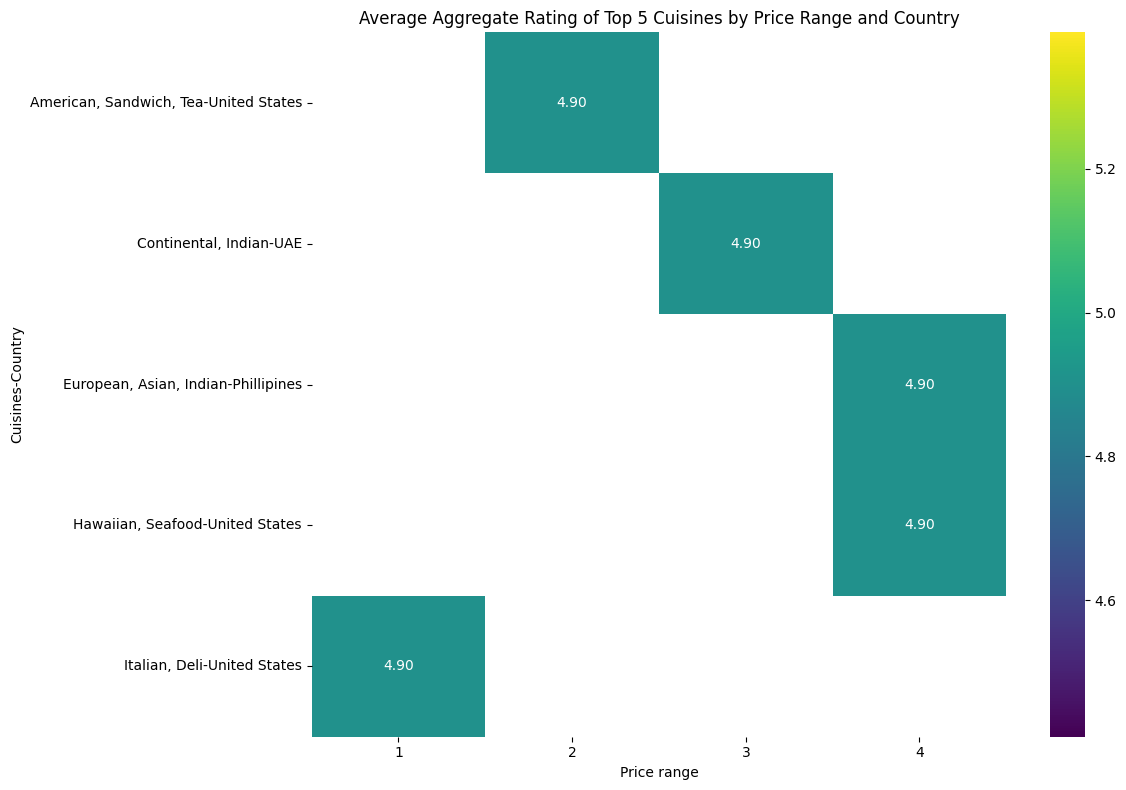

In [ ]:
top_5_cuisines = zomato_df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(5).index.tolist()

filtered_df = zomato_df[zomato_df['Cuisines'].isin(top_5_cuisines)]

cuisine_price_country_rating = filtered_df.groupby(['Cuisines', 'Price range', 'Country'])['Aggregate rating'].mean().reset_index()

heatmap_data = cuisine_price_country_rating.pivot_table(index=['Cuisines', 'Country'], columns='Price range', values='Aggregate rating')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Aggregate Rating of Top 5 Cuisines by Price Range and Country')
plt.tight_layout()

# Recommendations:

* Looking for a quick, tasty bite that won't break the bank?


 Head to the USA and grab an American sandwich or enjoy a relaxing cup of tea.

* Want a delicious meal that's still affordable?


Explore the diverse world of Continental cuisine in India or the UAE. You'll find flavorful dishes that offer excellent value for your money.

* Ready to splurge on an unforgettable dining experience?



Treat yourself to the exquisite flavors and artistry of high-end Japanese cuisine in India.

* Seeking consistently delicious food, no matter your budget?


 Look no further than trying Hawaiian seafood (U.S.A), Modern Australian cuisine in Australia or New Zealand and some nice delicacies in Europen, Asian cuisine in phillipines . You're sure to find delicious and well-prepared dishes at every price point.

# Summary:

There are still alot of exploration that can be done on this dataset but that will be depending on area of interest.